<a href="https://colab.research.google.com/github/prasad4fun/ML-Portfolio/blob/master/SGD_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df["PRICE"] = boston["target"]

In [0]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [0]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [78]:
X_train.shape

(339, 13)

In [0]:
def predict(x,m,c):
    y = np.dot(x,m) + c
    return y

In [0]:
from sklearn.utils import shuffle
from datetime import datetime
import numpy as np

def SGD(X, y, b = 0, iterations=1000, case_size=100, learning_rate=0.1, epsilon_val=0.004):
  start = datetime.now()
  
  n, m = X.shape
  w = np.zeros(m)
  costs = []
  decay_rate = 0.0001
  eta=learning_rate
  
  for iters in range(iterations):
    eta = eta * (1.0/(1+decay_rate*iters))
    X,y =  shuffle(X,y,random_state=0,replace=True)
    
    for i in range(case_size):
      x_mini = X[i:i+case_size]
      y_mini = y[i:i+case_size]
      
      error = y_mini -  (np.dot(x_mini,w) + b)
      
      w_grad = (-2.0/n)*(x_mini.T.dot(error))
      b_grad = (-2.0/n)*(np.sum(error))
      
      cost = (1.0/n)*np.sum(np.power(error,2))
      w = w - (eta*w_grad)
      
      b = b - (eta*b_grad)
      costs.append(cost)
    
    if iters==0:
      w_prev = w;
    else:
      dist = (np.linalg.norm(w-w_prev))
      w_prev = w
      
      if(round(dist,6)<epsilon_val):
        print("no.of iterations: ",iters,"Cost: ",min(costs))
        break;
  
  print("Time Taken: ",datetime.now() - start)
  return w,b,cost;
  
  
 

In [94]:
W, b, cost = SGD(X_train, Y_train)

no.of iterations:  383 Cost:  2.258578604031417
Time Taken:  0:00:21.306032


In [95]:
W

array([-1.07683021,  1.33234151, -0.21200353,  0.7379908 , -1.6133276 ,
        1.59283747,  0.04379832, -3.52499102,  3.20041913, -2.70628212,
       -1.98005578,  0.415015  , -4.45024631])

In [0]:
def score(X,y,W,b):
  from sklearn.metrics import r2_score
  return r2_score(y,  (np.dot(X,W) + b).flatten())
  

In [97]:
score(X_test,Y_test,W,b)

0.7349281799976066

In [98]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
sgd_lr = SGDRegressor(eta0=0.1,shuffle=True)

sgd_lr.fit(X_train, Y_train)

y_pred = sgd_lr.predict(X_test)

r2_score(Y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6627142137567679

In [99]:
sgd_lr.coef_

array([-1.0746793 ,  1.51127157, -0.0458626 ,  2.59540771, -1.65018875,
        2.40576202, -0.33043501, -3.57594748,  3.34442553, -2.02609404,
       -1.91149006,  0.7671821 , -4.57515297])

# Scatter Plots of Actual Vs Predictions of Sklearn and Custom Impls

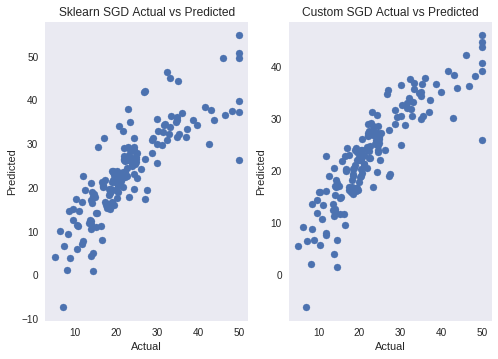

In [101]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.scatter(x=Y_test, y=y_pred);
plt.title('Sklearn SGD Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.subplot(122)
plt.scatter(x=Y_test, y = (np.dot(X_test,w)+b).flatten());
plt.title('Custom SGD Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.show()